In [124]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

In [129]:
def plot_kstest(x, data, x_delay=False, alpha=0.05):
    """
    H0: dist1 = dist2
    d < critical value, p-value > alpha -->> accept H0
    ------
    x: 1d array (time, delay mode)
    data: 2d array (visibility, power)
    x_delay: is x axis delay? (default: False)
    alpha: significance level (default: 0.05)
    ------
    Data matrix rows -->> time sample
    Data matrix columns -->> frequency/delay mode
    """
    
    if x_delay:
        data = np.transpose(data)
    
    # fit each dataset with a normal distribution
    mu = []
    std = []
    for i in range(len(data)):
        mu.append(norm.fit(data[i])[0])
        std.append(norm.fit(data[i])[1])
        
    # get cdf of each dataset
    cdf = []
    for i in range(len(data)):
        cdf.append(np.array(range(len(data[i])))/float(len(data[i])))
    
    # get cdf of each fit
    norm_cdf = []
    for i in range(len(data)):
        norm_cdf.append(norm.cdf(np.sort(data[i]), mu[i], std[i]))
    
    # perform KS test between each empirical dataset with its corresponding normal distribution
    # get d (KS statistic) and p-values
    d = []
    p = []
    for i in range(len(data)):
        d.append(stats.ks_2samp(cdf[i], norm_cdf[i])[0])
        p.append(stats.ks_2samp(cdf[i], norm_cdf[i])[1])
    
    # get critical value (significance level = 0.05) (by the AD-test function)
    cv = []
    for i in range(len(data)):
        cv.append(stats.anderson_ksamp([cdf[i], norm_cdf[i]])[1][2])
    
    # plot cdf if the number of datasets is small
    if len(data) < 16:
        plt.figure(figsize=(12, 12))
        for i in range(1, len(cv)+1):
            plt.subplot(6, 4, i)
            i -= 1
            plt.plot(np.sort(data[i]), norm_cdf[i],'b--')
            plt.plot(np.sort(data[i]), cdf[i], 'r-')
            plt.grid()
    
    # plot KS test results
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot
    ax.plot(x, d, 'r-', label='KS statistics')
    ax.plot
    ax.plot(x, cv, 'b--', label='Critical values')
    ax.grid()
    ax.legend()
    
    plt.subplot(2, 1, 1)
    plt.plot(x, [alpha for i in range(len(x))], 'k--', label='Significance level')
    plt.plot(x, p, 'g-', label="p values")
    plt.legend()
    plt.grid()
    plt.subplot(2, 1, 2)
    plt.plot(x, cv, 'b--', label='Critical values')
    plt.plot(x, d, 'r-', label='KS statistics')
    plt.legend()
    plt.grid()
    plt.show()

p-value capped: true value larger than 0.25


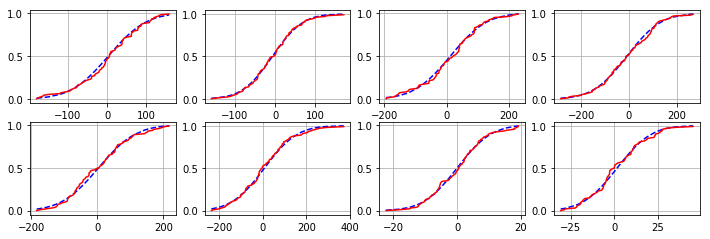

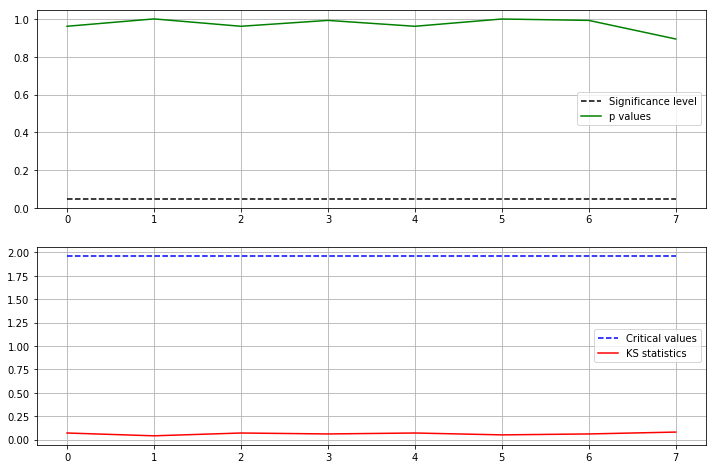

In [131]:
# "plot_kstest" example

data = []
std = np.abs(np.random.normal(0, 100, 8))
for i in range(8):
    data.append(np.random.normal(0, std[i], 100))
x = np.linspace(0, len(data)-1, len(data))
plot_kstest(x, data)